# Meta Data

### Note: 

The data was only one column and separated by ";" so I used excel to handle it before starting working on it.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import warnings
from scipy.stats import boxcox
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import *
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

warnings.filterwarnings("ignore")

In [2]:
# load the dataset
df = pd.read_csv(r'D:\Courses\Prodigy Intern\Task3\bank-full.csv')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.shape

(45211, 17)

# Data preparation:

Every row is unique as It's managed using Excel

## Chacking for missing values

In [7]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### See Statistical summary

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### Findings:
- Balance: min of balance is -8019 -> it is not logic we can just remove the (-)
- duration: the column has right skewed distribution
- Campaign: right skewed
- pdays: invalid values (-1), outliars, right skwewd
- previous: invalid values, right skewed


In [9]:
# Drop unnecessary column
df.drop('previous', axis=1, inplace=True)
df.drop('pdays', axis=1, inplace=True)

In [10]:
# Apply abs function to each column separately to make all values positive
df['age'] = df['age'].abs()
df['balance'] = df['balance'].abs()
df['duration'] = df['duration'].abs()
df['campaign'] = df['campaign'].abs()

In [11]:
df['balance'].describe()

count     45211.000000
mean       1415.196081
std        3020.529906
min           0.000000
25%         137.000000
50%         485.000000
75%        1436.000000
max      102127.000000
Name: balance, dtype: float64

### Apply visualization to discover more in the dataset like outliars and distribution

#### seperate the numerical and categorical values

In [12]:
num_cols = df.select_dtypes(include=['int', 'float']).columns
cat_cols = df.select_dtypes(include=['object']).columns

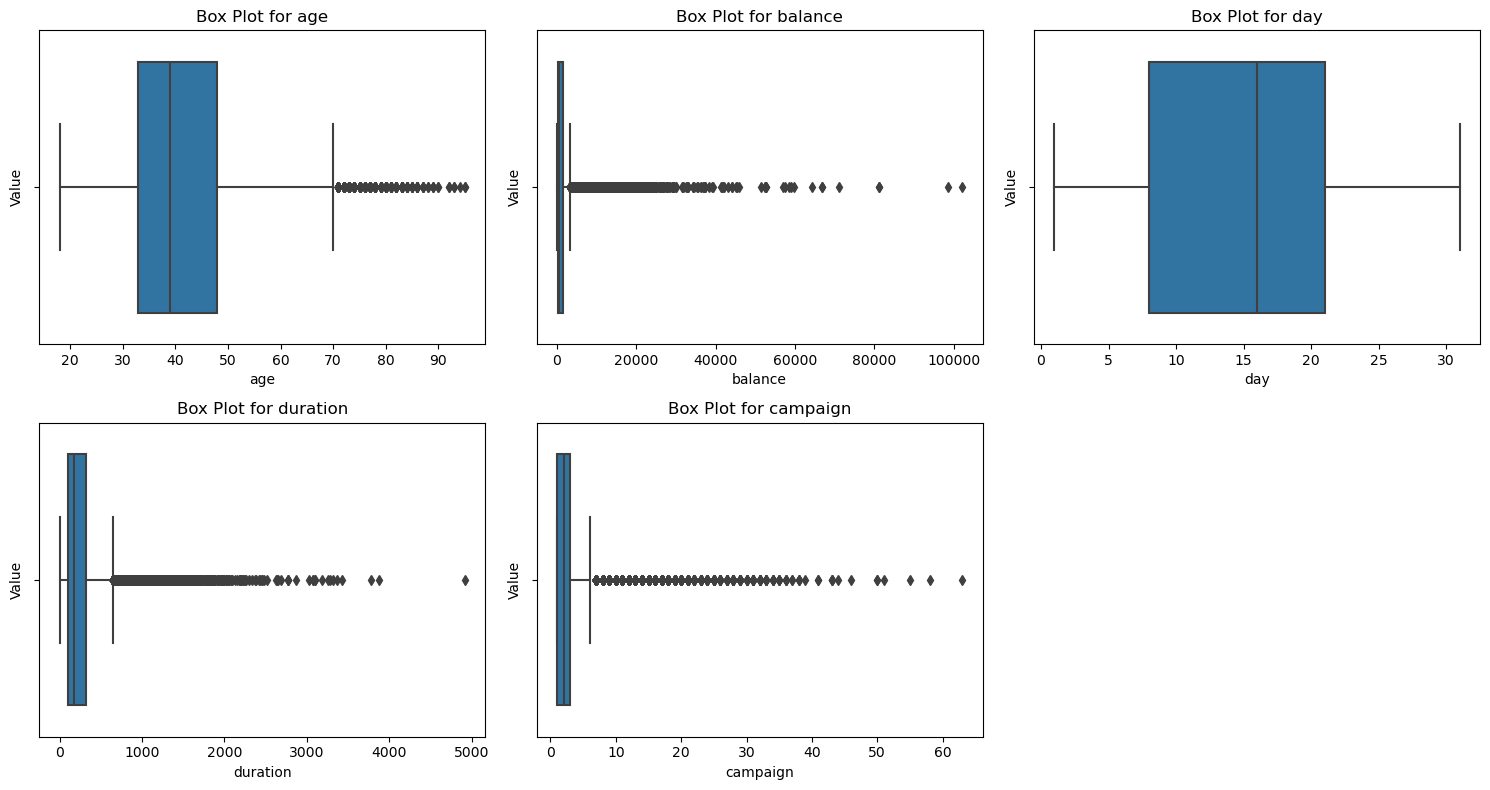

In [13]:
# Display boxplots for numerical columns in three columns
num_cols_per_row = 3
num_rows = (len(num_cols) + num_cols_per_row - 1) // num_cols_per_row

plt.figure(figsize=(15, 4 * num_rows))

for i, col in enumerate(num_cols):
    plt.subplot(num_rows, num_cols_per_row, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

#### Yeo-Johnson Transformation & log transformation

In [14]:
# Initialize PowerTransformer for Yeo-Johnson transformation
transformer = preprocessing.LabelEncoder()

# Fit and transform the columns using Yeo-Johnson transformation
df['age'] = transformer.fit_transform(df[['age']])
df['balance'] = transformer.fit_transform(df[['balance']])
df['duration'] = transformer.fit_transform(df[['duration']])
df['campaign'] = transformer.fit_transform(df[['campaign']])

In [15]:
# log transformation

df['balance'] = np.log1p(df['balance'])
df['age'] = np.log1p(df['age'])
df['duration'] = np.log1p(df['duration'])
df['campaign'] = np.log1p(df['campaign'])

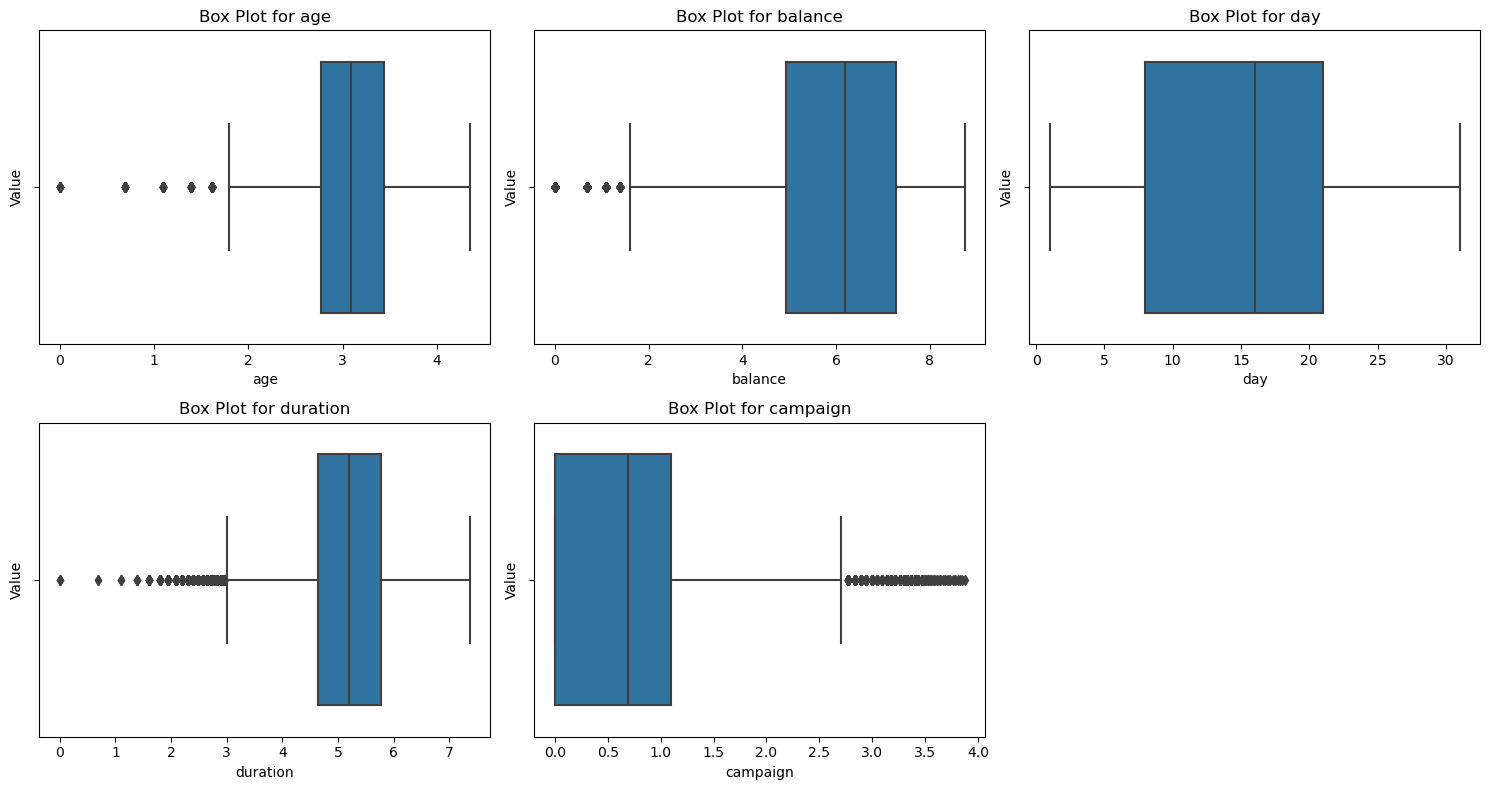

In [16]:
# Display boxplots for numerical columns in three columns
num_cols_per_row = 3
num_rows = (len(num_cols) + num_cols_per_row - 1) // num_cols_per_row

plt.figure(figsize=(15, 4 * num_rows))

for i, col in enumerate(num_cols):
    plt.subplot(num_rows, num_cols_per_row, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

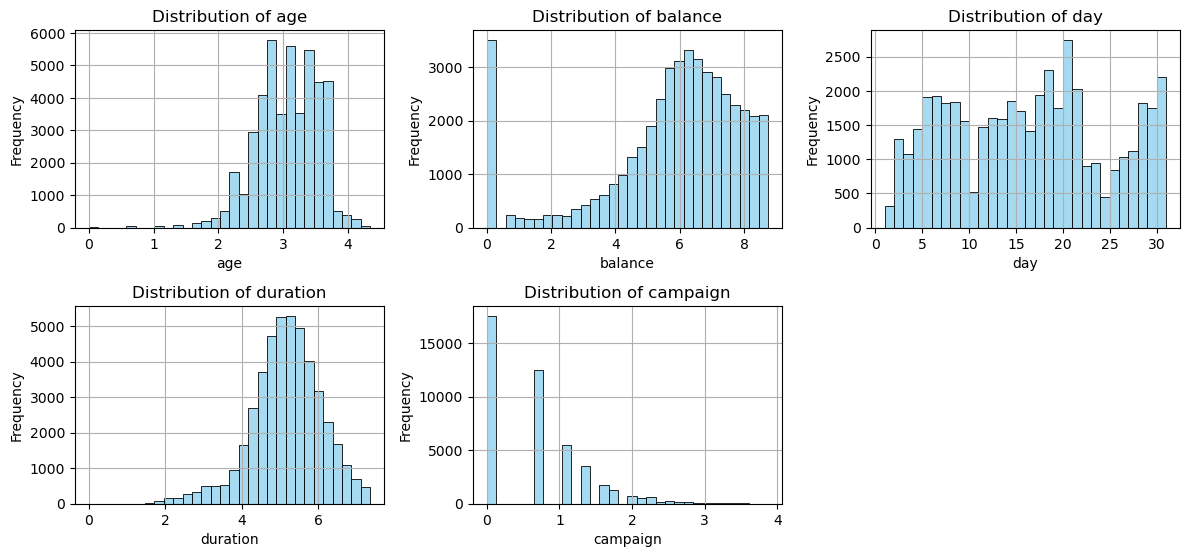

In [17]:
# Plot histograms for all numerical columns using Seaborn
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=30, kde=False, color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.grid(True)

plt.tight_layout()
plt.show()

### Examine categorization column

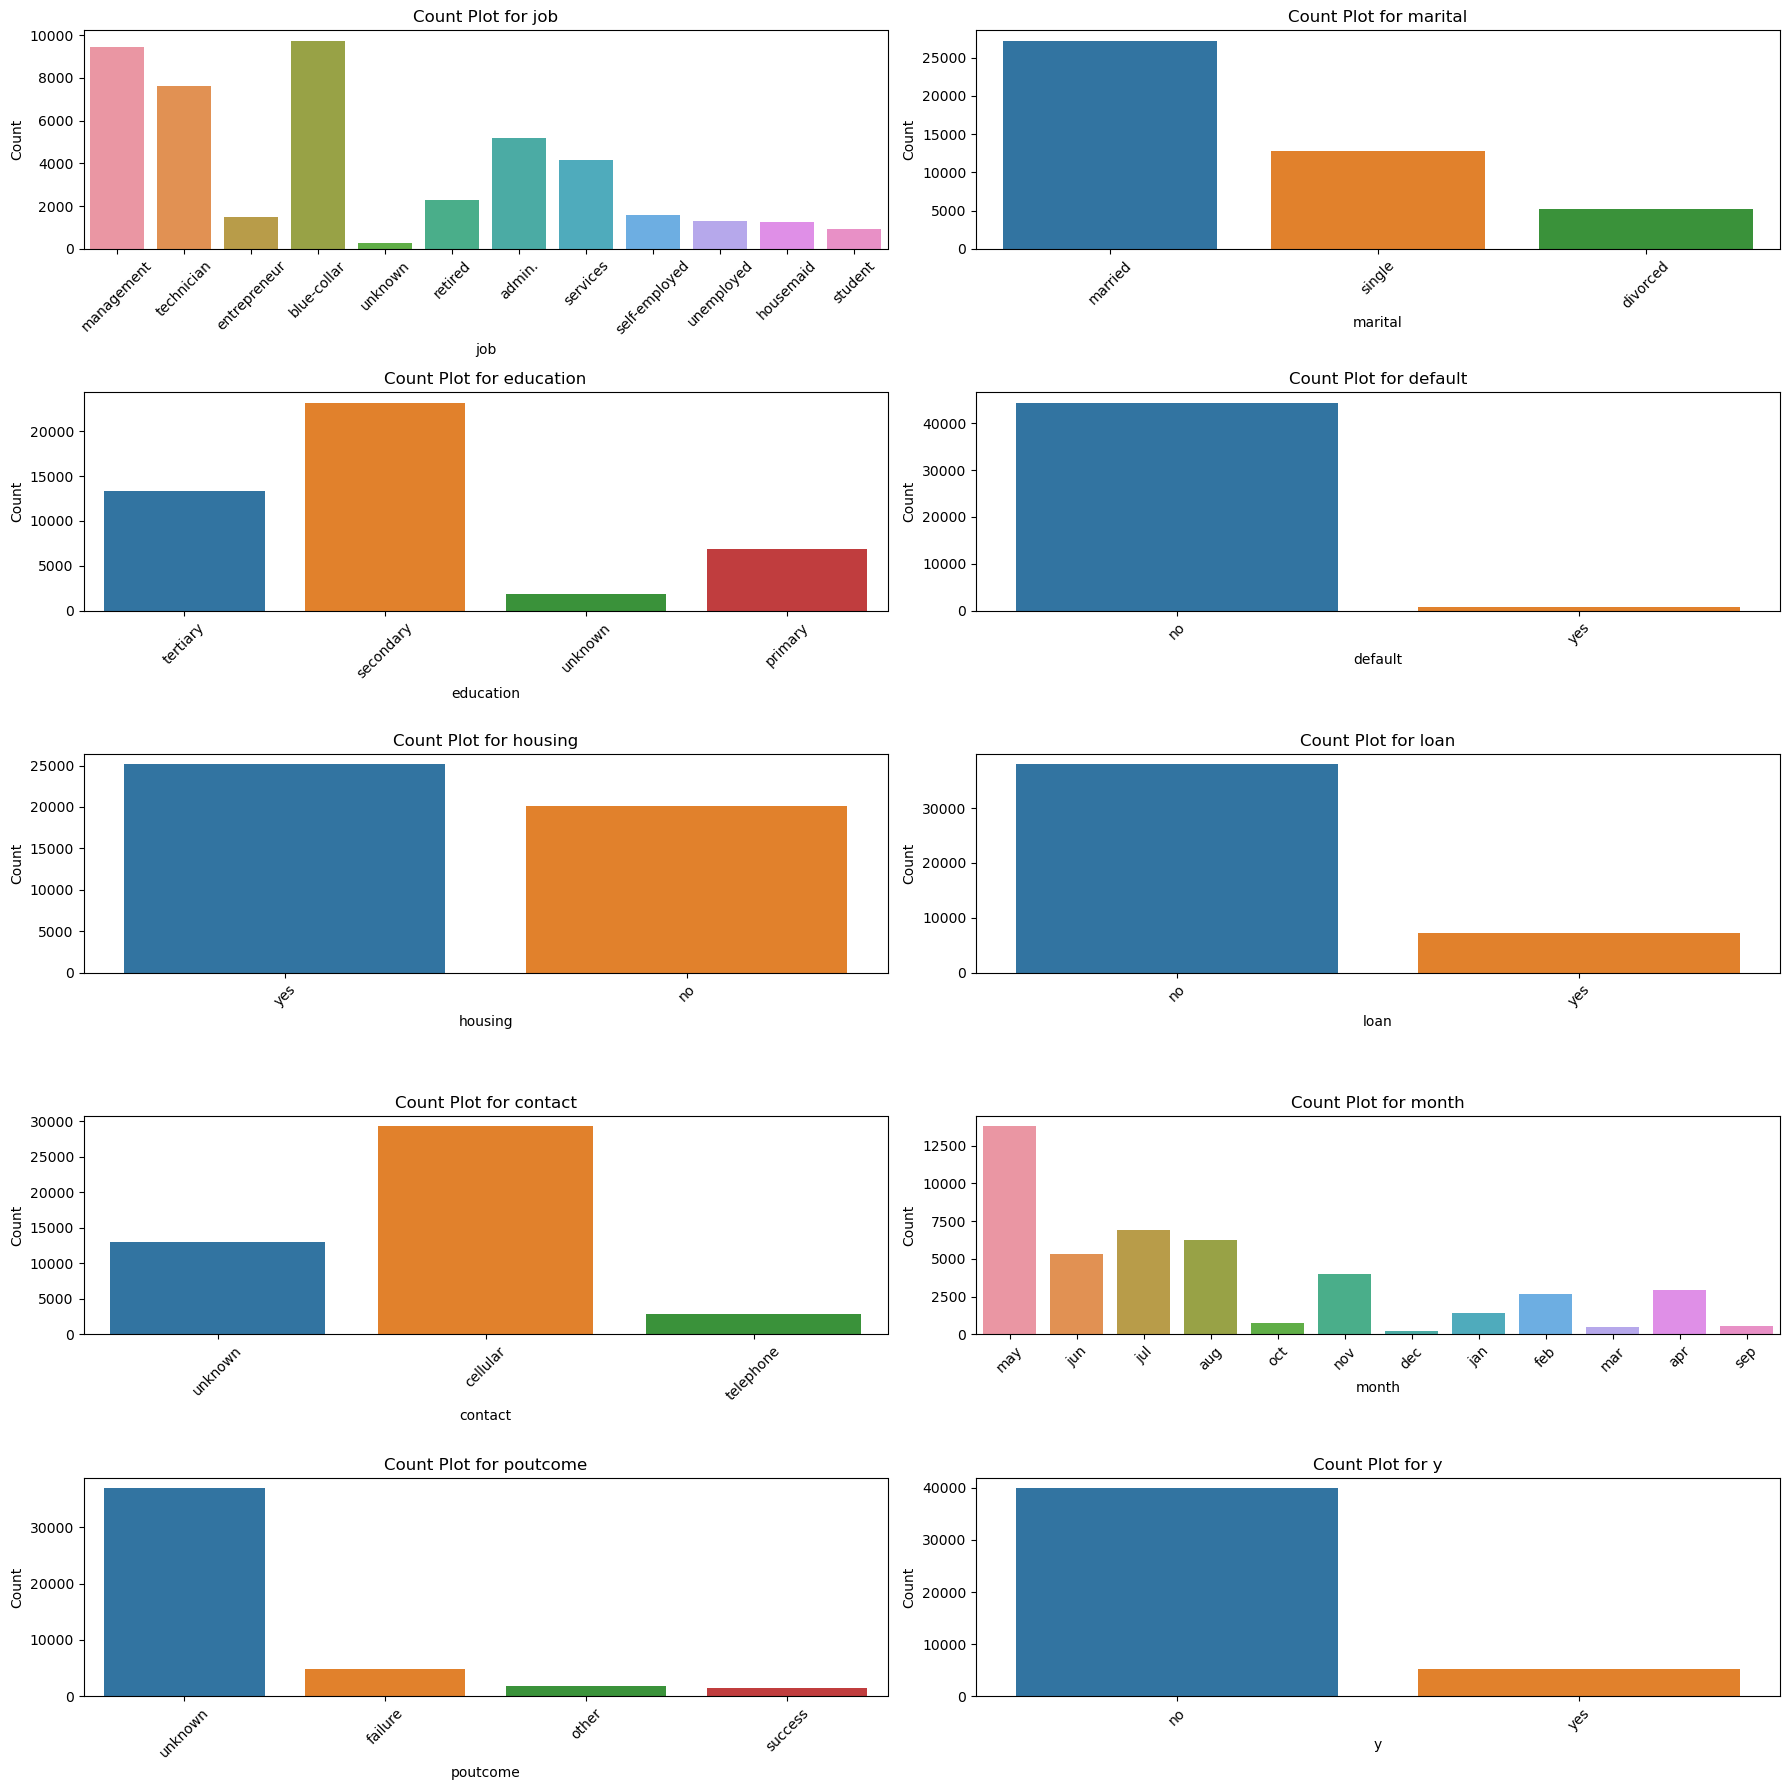

In [18]:
# Create subplots for categorical columns
fig, axes = plt.subplots(nrows=len(cat_cols)//2, ncols=2, figsize=(18, 18))
for ax, col in zip(axes.flatten(), cat_cols):
    sns.countplot(data=df, x=col, ax=ax)
    ax.set_title(f'Count Plot for {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

In [19]:
print(cat_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [20]:
#encode cat cols
le = preprocessing.LabelEncoder()
    
df['job'] = le.fit_transform(df['job'])
df['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['month'] = le.fit_transform(df['month'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['y'] = le.fit_transform(df['y'])
df['poutcome'] = le.fit_transform(df['poutcome'])

## Heat map to know the relationship between numerical variables.

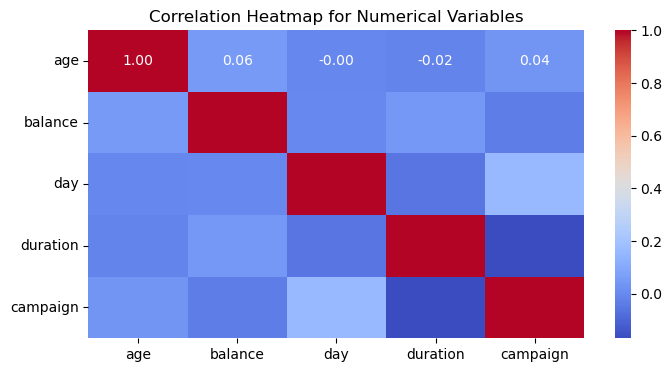

In [21]:
# Select numerical columns only
numerical_df = df[num_cols]

# Calculate correlation matrix
corr_matrix = numerical_df.corr()

# Create a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numerical Variables')
plt.show()

## Relationship between Marital Status and Balance

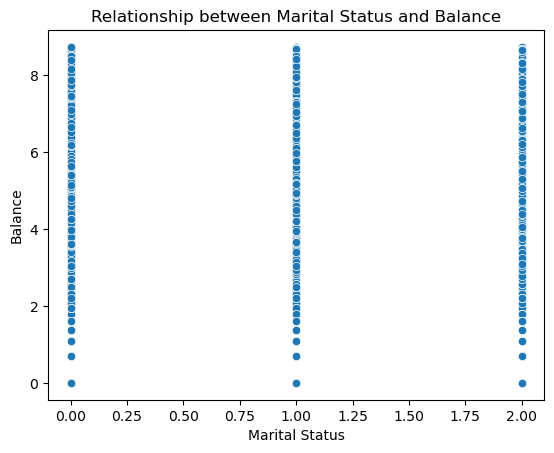

In [22]:
sns.scatterplot(x='marital', y='balance', data=df)
plt.title('Relationship between Marital Status and Balance')
plt.xlabel('Marital Status')
plt.ylabel('Balance')
plt.show()

# Apply Desicion Tree Model

In [23]:
# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(df.drop('y', axis=1), df['y'], test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [24]:
# Initialize the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

In [25]:
# Define the hyperparameters grid for grid search
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [26]:
# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1')

In [27]:
# Get the best model from grid search
best_dt_model = grid_search.best_estimator_

In [28]:
# Evaluate the model on the validation set
y_valid_pred = best_dt_model.predict(X_valid)
print(classification_report(y_valid, y_valid_pred))

# Evaluate the model on the test set
y_test_pred = best_dt_model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      5961
           1       0.58      0.43      0.49       821

    accuracy                           0.89      6782
   macro avg       0.75      0.69      0.71      6782
weighted avg       0.88      0.89      0.89      6782

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      6005
           1       0.58      0.40      0.48       777

    accuracy                           0.90      6782
   macro avg       0.75      0.68      0.71      6782
weighted avg       0.89      0.90      0.89      6782

